In [9]:
import requests
import json
import matplotlib.pyplot as plt
import numpy as np

# Fetching the data

In [10]:
response = requests.get("https://datausa.io/api/data?drilldowns=Nation&measures=Population")

In [11]:
data = response.content
data = json.loads(data)
data = data["data"]
data

[{'ID Nation': '01000US',
  'Nation': 'United States',
  'ID Year': 2020,
  'Year': '2020',
  'Population': 326569308,
  'Slug Nation': 'united-states'},
 {'ID Nation': '01000US',
  'Nation': 'United States',
  'ID Year': 2019,
  'Year': '2019',
  'Population': 324697795,
  'Slug Nation': 'united-states'},
 {'ID Nation': '01000US',
  'Nation': 'United States',
  'ID Year': 2018,
  'Year': '2018',
  'Population': 322903030,
  'Slug Nation': 'united-states'},
 {'ID Nation': '01000US',
  'Nation': 'United States',
  'ID Year': 2017,
  'Year': '2017',
  'Population': 321004407,
  'Slug Nation': 'united-states'},
 {'ID Nation': '01000US',
  'Nation': 'United States',
  'ID Year': 2016,
  'Year': '2016',
  'Population': 318558162,
  'Slug Nation': 'united-states'},
 {'ID Nation': '01000US',
  'Nation': 'United States',
  'ID Year': 2015,
  'Year': '2015',
  'Population': 316515021,
  'Slug Nation': 'united-states'},
 {'ID Nation': '01000US',
  'Nation': 'United States',
  'ID Year': 2014,
  

# Filtering the data

## Getting population per year

In [12]:
population_per_year = [(period["Year"], period["Population"]) for period in data]
population_per_year

[('2020', 326569308),
 ('2019', 324697795),
 ('2018', 322903030),
 ('2017', 321004407),
 ('2016', 318558162),
 ('2015', 316515021),
 ('2014', 314107084),
 ('2013', 311536594)]

# Calculating growth rates

In [13]:
population_growth_rates = []
for i in range(len(population_per_year) - 1):
    population_growth_rates.append((f"{population_per_year[i + 1][0]}-{population_per_year[i][0]}", population_per_year[i][1] - population_per_year[i + 1][1]))
population_growth_rates

[('2019-2020', 1871513),
 ('2018-2019', 1794765),
 ('2017-2018', 1898623),
 ('2016-2017', 2446245),
 ('2015-2016', 2043141),
 ('2014-2015', 2407937),
 ('2013-2014', 2570490)]

# Calculating growth rate [ min | average | max ]

In [16]:
growth_rate_minimum = min([x[1] for x in population_growth_rates])
print("Minimum:", growth_rate_minimum)
growth_rate_average = sum([x[1] for x in population_growth_rates]) / len(population_growth_rates)
print("Average:", growth_rate_average)
growth_rate_maximum = max([x[1] for x in population_growth_rates])
print("Maximum:", growth_rate_average)


Minimum: 1794765
Average: 2147530.5714285714
Maximum: 2147530.5714285714


# Data graph

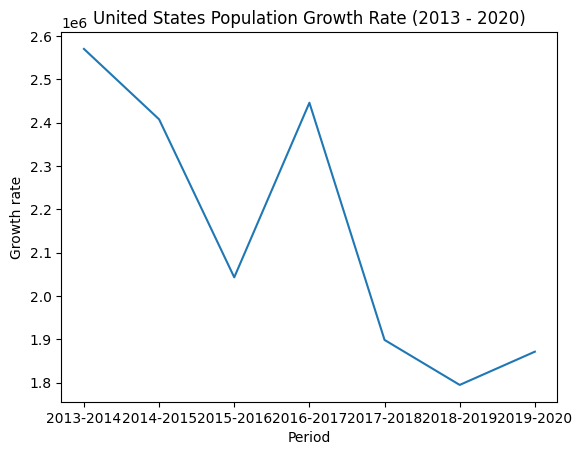

In [19]:
x = [x[0] for x in population_growth_rates]
x.reverse()
y = [y[1] for y in population_growth_rates]
y.reverse()

fig, ax = plt.subplots()
ax.plot(x, y)

plt.title("United States Population Growth Rate (2013 - 2020)")
plt.xlabel("Period")
plt.ylabel("Growth rate")

plt.show()